<a href="https://colab.research.google.com/github/lucasoliveira13/Digital_Image_Processing/blob/main/Atividade_4_PDI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Processamento de Imagens - Atividade 4

> Grupo:

1.   Guilherme Vilarim
2.   Lucas Matheus Oliveira



In [ ]:
import numpy as np
from google.colab import drive
import matplotlib.pyplot as plt
import matplotlib.image as img
from PIL import Image
import os
from collections import Counter

drive.mount('/content/drive')
dataset = '/content/drive/MyDrive/PDI/atividade_4'


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
def realize_fft(imagem):
    f = np.fft.fft2(image)
    fshift = np.fft.fftshift(f)
    magnitude_spectrum = spectrum(fshift)
    return fshift, magnitude_spectrum

In [ ]:
def mask_threshold(magnitude_spectrum,threshold):
    mask = np.zeros_like(magnitude_spectrum)
    mask[magnitude_spectrum > threshold] = 1
    return mask

In [ ]:
def mask_threshold_2(magnitude_spectrum, threshold):
    mask = np.zeros_like(magnitude_spectrum)
    mask[magnitude_spectrum < threshold] = 1
    return mask

In [ ]:
def spectrum(fft):
  magnitude_spectrum = 20 * np.log(np.abs(fft))
  return magnitude_spectrum

In [ ]:
def realize_fft_iff(fshift_filtered):
    f_ishift = np.fft.ifftshift(fshift_filtered)
    image_filtered = np.fft.ifft2(f_ishift)
    image_filtered = np.abs(image_filtered)
    return image_filtered

In [ ]:
def create_circular_mask(shape, center, radius):
    rows, cols = shape
    mask = np.zeros((rows, cols), dtype=np.uint8)
    for i in range(rows):
        for j in range(cols):
            if (i - center[0])**2 + (j - center[1])**2 <= radius**2:
                mask[i, j] = 1
    return mask

In [ ]:
def create_high_pass_filter(shape, cutoff_freq):
    rows, cols = shape
    center_row, center_col = rows // 2, cols // 2
    mask = np.ones((rows, cols), dtype=np.float32)
    for i in range(rows):
        for j in range(cols):
            distance = np.sqrt((i - center_row) ** 2 + (j - center_col) ** 2)
            mask[i, j] = 1 - np.exp(-(distance ** 2) / (2 * cutoff_freq ** 2))
    return mask


In [ ]:
def create_elliptical_mask(shape, major_axis, minor_axis):
    rows, cols = shape
    center_row, center_col = rows // 2, cols // 2
    mask = np.ones((rows, cols), dtype=np.uint8)

    for row in range(rows):
        for col in range(cols):
            y = (row - center_row) / minor_axis
            x = (col - center_col) / major_axis
            distance = x ** 2 + y ** 2
            if distance <= 1:
                mask[row, col] = 0

    return mask

In [ ]:
def apply_mask(fshift,mask):
    fshift_filtered = fshift * mask

    magnitude_spectrum_filtered = spectrum(fshift_filtered)

    image_filtered = realize_fft_iff(fshift_filtered)

    return image_filtered

In [ ]:
def plot(image,magnitude_spectrum,mask,image_filtered):

    plt.figure(figsize=(12, 4))

    # Imagem original
    plt.subplot(141)
    plt.imshow(image, cmap='gray')
    plt.title('Imagem original')
    plt.axis('off')

    # Transformada de Fourier
    plt.subplot(142)
    plt.imshow(magnitude_spectrum, cmap='gray')
    plt.title('Transformada de Fourier')
    plt.axis('off')

    # Máscara
    plt.subplot(143)
    plt.imshow(mask, cmap='gray')
    plt.title('Máscara')
    plt.axis('off')

    # Imagem filtrada
    plt.subplot(144)
    plt.imshow(image_filtered, cmap='gray')
    plt.title('Imagem Filtrada')
    plt.axis('off')

    plt.tight_layout()
    plt.show()

<ipython-input-164-880687bb6242>:2: RuntimeWarning: divide by zero encountered in log
  magnitude_spectrum = 20 * np.log(np.abs(fft))


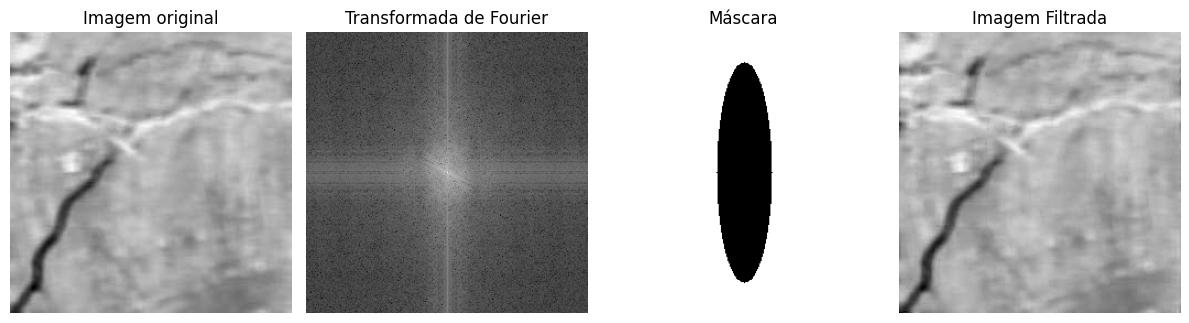

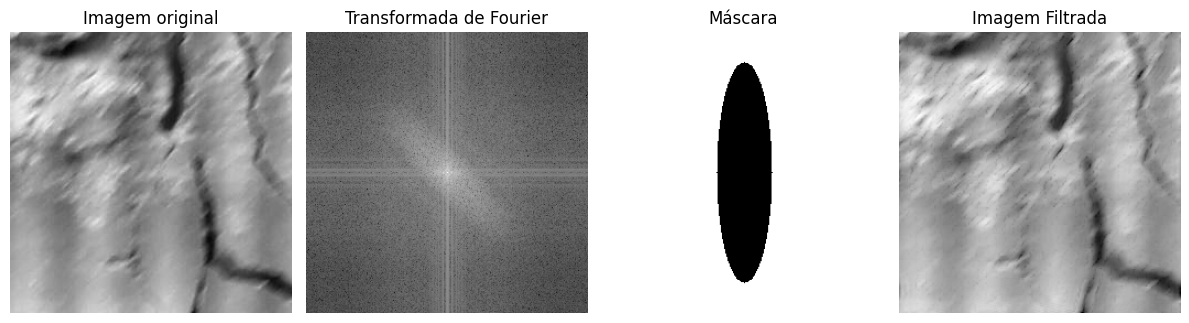

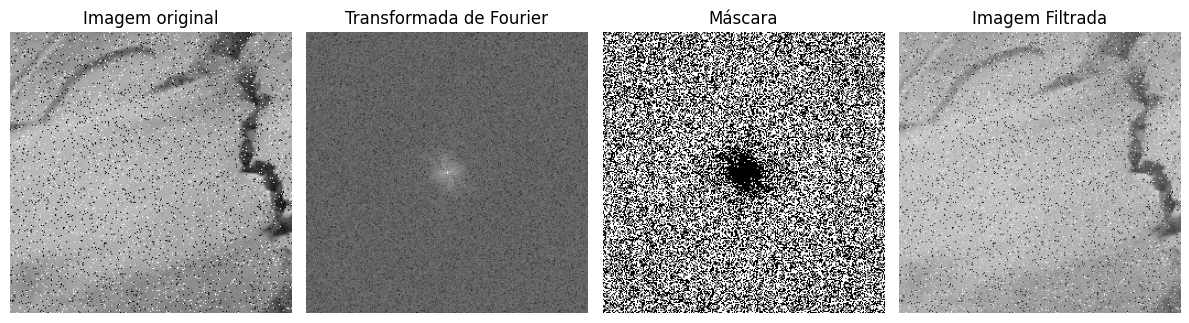

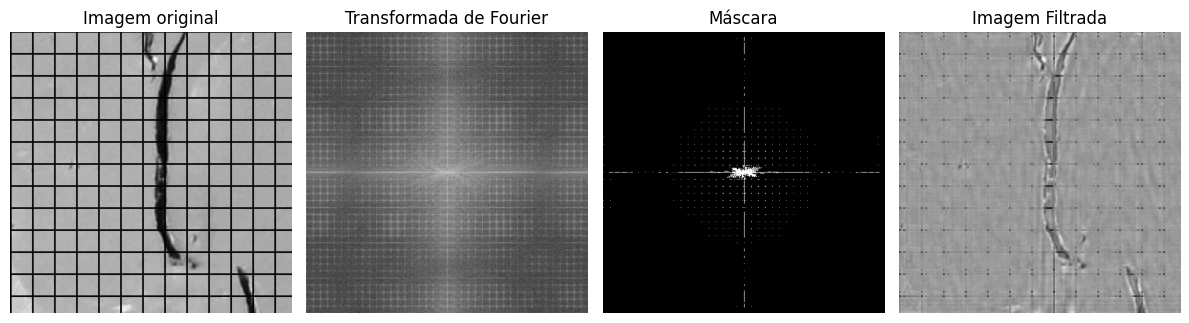

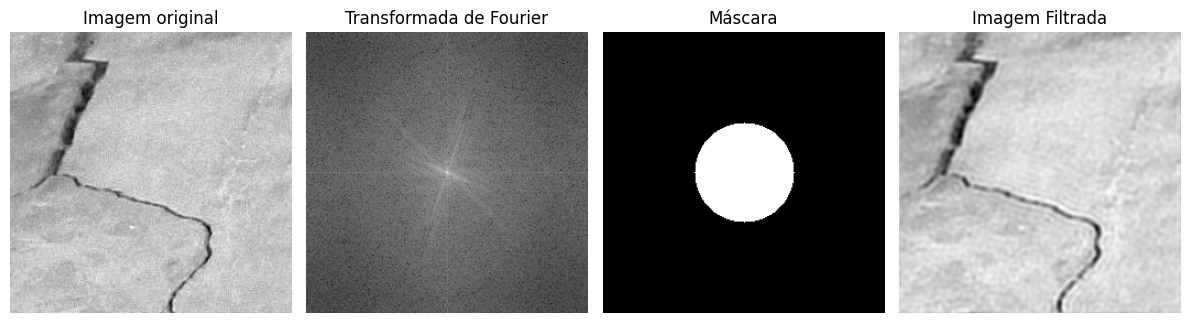

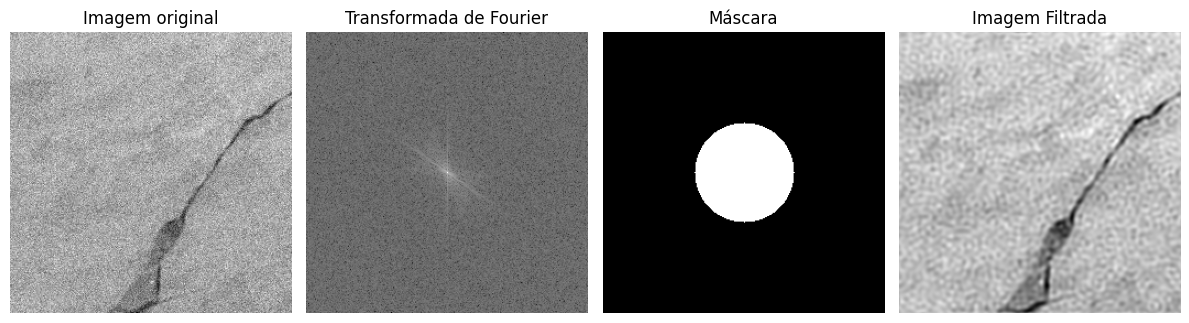

In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
import cv2

diretorio = '/content/drive/MyDrive/PDI/atividade_4'

imagens = os.listdir(diretorio)

for imagem_nome in imagens:
    imagem_path = os.path.join(diretorio, imagem_nome)

    image = cv2.imread(imagem_path, 0)

    fshift, magnitude_spectrum = realize_fft(image)

    #aplica a mascara utilizando o threshold
    if imagem_nome == 'S1.jpg':
      mask = mask_threshold(magnitude_spectrum,220)
      image_filtered = apply_mask(fshift,mask)
      imagem_final = image - image_filtered
      plot(image,magnitude_spectrum,mask,imagem_final)
    #a mascara é um circulo
    elif imagem_nome in ['S2.jpg','S3.jpg']:
      rows, cols = image.shape
      center = (rows // 2, cols // 2)
      radius = 45
      mask = create_circular_mask((rows, cols), center, radius)
      image_filtered = apply_mask(fshift,mask)
      plot(image,magnitude_spectrum,mask,image_filtered)
    #novamente utilizando um threshold
    elif imagem_nome == 'A3.jpg':
      mask = mask_threshold_2(magnitude_spectrum,180)
      image_filtered = apply_mask(fshift,mask)
      imagem_final = image - image_filtered
      plot(image,magnitude_spectrum,mask,imagem_final)
    #a mascara utilizada é uma elipse
    else:
      mask = create_elliptical_mask(image.shape, 25, 100) #a2
      image_filtered = apply_mask(fshift,mask)
      imagem_final = image - image_filtered
      plot(image,magnitude_spectrum,mask,imagem_final)